In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import glob
from astropy.visualization import make_lupton_rgb
from scipy import ndimage

In [3]:
hdul = fits.open("Datos/Light_NGC_1976_sloan_i_5.000secs_00000157.fit")
hdul.info()

Filename: Datos/Light_NGC_1976_sloan_i_5.000secs_00000157.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      63   (4096, 4096)   int16 (rescales to uint16)   


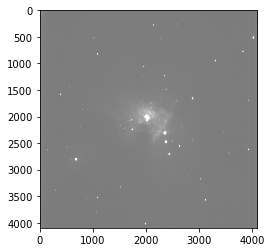

In [4]:
image= np.array(hdul[0].data)
plt.imshow(image,cmap="gray",vmax=np.mean(image)+np.std(image),vmin=np.mean(image)-np.std(image))

In [5]:
def Fits_Array(a):
    b=np.empty([4096,4096,0])
    for i in range(len(a)):
        x=fits.open(a[i])
        b=np.dstack((b,np.array(x[0].data)))
    return b

In [6]:
def insertar_rayos(x):
    b=np.empty([100,2,0],dtype=int)
    for n in range(np.size(x,axis=2)):
        p=(np.random.randint(0,4096,size=(100,2)))
        b=np.dstack((b,p))
    for i in range(100):
        for j in range(np.size(x,axis=2)):
            x[b[i,0,j],b[i,1,j],j]=60000
            x[b[i,0,j],b[i,1,j]+2,j]=60000
            x[b[i,0,j]+1,b[i,1,j],j]=60000
            x[b[i,0,j]+1,b[i,1,j]+1,j]=60000
            x[b[i,0,j]+1,b[i,1,j]+2,j]=60000
            x[b[i,0,j]+1,b[i,1,j]+3,j]=60000
            x[b[i,0,j]+2,b[i,1,j]+2,j]=60000
            x[b[i,0,j]+2,b[i,1,j]+3,j]=60000
            x[b[i,0,j]+3,b[i,1,j],j]=60000
            x[b[i,0,j]+3,b[i,1,j]+1,j]=60000
            x[b[i,0,j]+3,b[i,1,j]+2,j]=60000
            
    return x
    

## 2.Reducción de imagenes

In [7]:
b=glob.glob('datos_OMA/BIAS*.fit')
d=glob.glob('datos_OMA/DARK_5*.fit')
fb=glob.glob('datos_OMA/FLAT_B*.fit')
fsg=glob.glob('datos_OMA/FLAT_sloan_g*.fit')
fsi=glob.glob('datos_OMA/FLAT_sloan_i*.fit')
fsr=glob.glob('datos_OMA/FLAT_sloan_r*fit')
fv=glob.glob('datos_OMA/FLAT_V*.fit')
Lb=glob.glob('datos_OMA/Light_NGC_1976_B*.fit')
Lsg=glob.glob('datos_OMA/Light_NGC_1976_sloan_g*.fit')
Lsi=glob.glob('datos_OMA/Light_NGC_1976_sloan_i*.fit')
Lsr=glob.glob('datos_OMA/Light_NGC_1976_sloan_r*.fit')
Lv=glob.glob('datos_OMA/Light_NGC_1976_v*.fit')
Lb2=glob.glob('datos_OMA/Light_NGC_104_B*.fit')
Lsg2=glob.glob('datos_OMA/Light_NGC_104_sloan_g*.fit')
Lsi2=glob.glob('datos_OMA/Light_NGC_104_sloan_i*.fit')
Lsr2=glob.glob('datos_OMA/Light_NGC_104_sloan_r*.fit')
Lv2=glob.glob('datos_OMA/Light_NGC_104_V*.fit')

### 4. 5. 6.

In [8]:
Bias=Fits_Array(b)
Dark=Fits_Array(d)
FLAT_B=Fits_Array(fb)
FLAT_sloan_g=Fits_Array(fsg)
FLAT_sloan_i=Fits_Array(fsi)
FLAT_sloan_r=Fits_Array(fsr)
FLAT_V=Fits_Array(fv)

In [9]:
Master_Bias=np.mean(Bias,axis=2)
Master_Dark=np.mean(Dark,axis=2)
Dark_Bias=(Master_Bias+Master_Dark)/2
Master_Flat_B=np.mean(FLAT_B,axis=2)
Master_Flat_V=np.mean(FLAT_V,axis=2)
Master_Flat_sloan_g=np.mean(FLAT_sloan_g,axis=2)
Master_Flat_sloan_i=np.mean(FLAT_sloan_i,axis=2)
Master_Flat_sloan_r=np.mean(FLAT_sloan_r,axis=2)

In [10]:
Norm_Master_Flat_B=(Master_Flat_B-Dark_Bias)/(np.median(Master_Flat_B-Dark_Bias))
Norm_Master_Flat_V=(Master_Flat_V-Dark_Bias)/(np.median(Master_Flat_V)-Dark_Bias)
Norm_Master_Flat_sloan_r=(Master_Flat_sloan_r-Dark_Bias)/(np.median(Master_Flat_sloan_r)-Dark_Bias)
Norm_Master_Flat_sloan_i=(Master_Flat_sloan_i-Dark_Bias)/(np.median(Master_Flat_sloan_i)-Dark_Bias)
Norm_Master_Flat_sloan_g=(Master_Flat_sloan_g-Dark_Bias)/(np.median(Master_Flat_sloan_g)-Dark_Bias)

## Nebulosa de Orion ##

In [11]:
Light_B=Fits_Array(Lb)
Light_sloan_g=Fits_Array(Lsg)
Light_sloan_i=Fits_Array(Lsi)
Light_sloan_r=Fits_Array(Lsr)
Light_V=Fits_Array(Lv)

In [12]:
Raw_Orion_B=np.mean(Light_B,axis=2)
Raw_Orion_V=np.mean(Light_V,axis=2)
Raw_Orion_sloan_i=np.mean(Light_sloan_i,axis=2)
Raw_Orion_sloan_g=np.mean(Light_sloan_g,axis=2)
Raw_Orion_sloan_r=np.mean(Light_sloan_r,axis=2)

In [13]:
Orion_B=(Raw_Orion_B-Dark_Bias)/Norm_Master_Flat_B
Orion_V=(Raw_Orion_V-Dark_Bias)/Norm_Master_Flat_V
Orion_sloan_r=(Raw_Orion_sloan_r-Dark_Bias)/Norm_Master_Flat_sloan_r
Orion_sloan_i=(Raw_Orion_sloan_i-Dark_Bias)/Norm_Master_Flat_sloan_i
Orion_sloan_g=(Raw_Orion_sloan_g-Dark_Bias)/Norm_Master_Flat_sloan_g

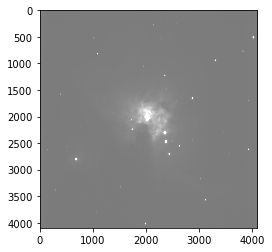

In [19]:
plt.imshow(Raw_Orion_V,cmap='gray',vmax=Raw_Orion_V.mean()+Raw_Orion_V.std(),vmin=Raw_Orion_V.mean()-Raw_Orion_V.std())

### 7.

In [20]:
np.random.seed(312312)
Rayos_Orion_B=insertar_rayos(Light_B)
Rayos_Orion_V=insertar_rayos(Light_V)
Rayos_Orion_sloan_g=insertar_rayos(Light_sloan_g)
Rayos_Orion_sloan_i=insertar_rayos(Light_sloan_i)
Rayos_Orion_sloan_r=insertar_rayos(Light_sloan_r)

In [21]:
Redux_Orion_B=np.median(Rayos_Orion_B,axis=2)
Redux_Orion_V=np.median(Rayos_Orion_V,axis=2)
Redux_Orion_sloan_g=np.median(Rayos_Orion_sloan_g,axis=2)
Redux_Orion_sloan_i=np.median(Rayos_Orion_sloan_i,axis=2)
Redux_Orion_sloan_r=np.median(Rayos_Orion_sloan_r,axis=2)

In [60]:
OrionB=(Redux_Orion_B-Dark_Bias)/Norm_Master_Flat_B
OrionV=(Redux_Orion_V-Dark_Bias)/Norm_Master_Flat_V
Orionsloang=(Redux_Orion_sloan_g-Dark_Bias)/Norm_Master_Flat_sloan_g
Orionsloani=(Redux_Orion_sloan_i-Dark_Bias)/Norm_Master_Flat_sloan_i
Orionsloanr=(Redux_Orion_sloan_r-Dark_Bias)/Norm_Master_Flat_sloan_r

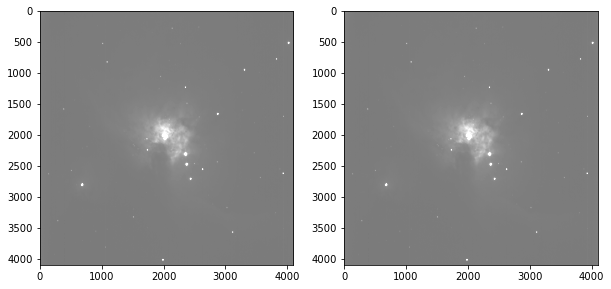

In [25]:
fig,ax=plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(Raw_Orion_V,cmap='gray',vmax=Raw_Orion_V.mean()+Raw_Orion_V.std(),vmin=Raw_Orion_V.mean()-Raw_Orion_V.std())
ax[1].imshow(Redux_Orion_V,cmap='gray',vmin=Redux_Orion_V.mean()-Redux_Orion_V.std(),vmax=Redux_Orion_V.mean()+Redux_Orion_V.std())

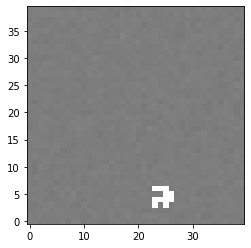

In [52]:
plt.imshow(Rayos_Orion_V[420:460,320:360,0],origin='lower',cmap='gray',vmin=Rayos_Orion_V[:,:,0].mean()-Rayos_Orion_V[:,:,0].std(),vmax=Rayos_Orion_V[:,:,0].mean()+Rayos_Orion_V[:,:,0].std())

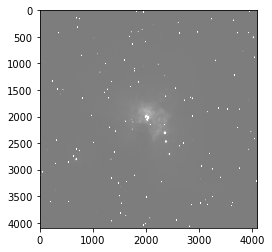

In [26]:
plt.imshow(Rayos_Orion_V[:,:,0],cmap='gray',vmin=Rayos_Orion_V[:,:,1].mean()-Rayos_Orion_V[:,:,1].std(),vmax=Rayos_Orion_V[:,:,1].mean()+Rayos_Orion_V[:,:,1].std())

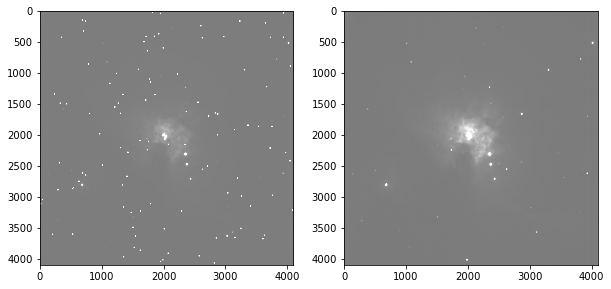

In [55]:
fig,ax=plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(Rayos_Orion_V[:,:,0],cmap='gray',vmax=Rayos_Orion_V[:,:,0].mean()+Rayos_Orion_V[:,:,0].std(),vmin=Rayos_Orion_V[:,:,0].mean()-Rayos_Orion_V[:,:,0].std())
ax[1].imshow(Redux_Orion_V,cmap='gray',vmin=Redux_Orion_V.mean()-Redux_Orion_V.std(),vmax=Redux_Orion_V.mean()+Redux_Orion_V.std())

## Manipulación de imagenes ##

### 11. ###

In [33]:
Logaritmo_Orion_B=np.log(Orion_B+208)
Exponencial_Orion_B=np.sin(Orion_B)
Raiz_Orion_B=np.sqrt(Orion_B+208)
Cubo_Orion_B=np.square(Orion_B)
Doble_Orion_B=2*Orion_B

In [34]:
np.amin(Orion_B)

-207.69846039514692

In [35]:
Logaritmo_Orion_V=np.log(Orion_V+333)
Exponencial_Orion_V=np.sin(Orion_V)
Raiz_Orion_V=np.sqrt(Orion_V+333)
Cubo_Orion_V=np.square(Orion_V)
Doble_Orion_V=2*Orion_V

In [36]:
np.amin(Orion_V)

-332.502761333983

In [37]:
Logaritmo_Orion_sloan_g=np.log(Orion_sloan_g+279)
Exponencial_Orion_sloan_g=np.sin(Orion_sloan_g)
Raiz_Orion_sloan_g=np.sqrt(Orion_sloan_g+279)
Cubo_Orion_sloan_g=np.square(Orion_sloan_g)
Doble_Orion_sloan_g=2*Orion_sloan_g

In [38]:
np.amin(Orion_sloan_g)

-278.8648759802741

In [39]:
Logaritmo_Orion_sloan_i=np.log(Orion_sloan_i+249)
Exponencial_Orion_sloan_i=np.sin(Orion_sloan_i)
Raiz_Orion_sloan_i=np.sqrt(Orion_sloan_i+249)
Cubo_Orion_sloan_i=np.square(Orion_sloan_i)
Doble_Orion_sloan_i=2*Orion_sloan_i

In [30]:
np.amin(Orion_sloan_i)

-248.61073257357668

In [40]:
Logaritmo_Orion_sloan_r=np.log(Orion_sloan_r+338)
Exponencial_Orion_sloan_r=np.sin(Orion_sloan_r)
Raiz_Orion_sloan_r=np.sqrt(Orion_sloan_r+338)
Cubo_Orion_sloan_r=np.square(Orion_sloan_r)
Doble_Orion_sloan_r=2*Orion_sloan_r

In [41]:
np.amin(Orion_sloan_r)

-337.95290168940363

### 12. 

In [42]:
boxcar=np.ones([3,3])/9
identidad=np.array([[0,0,0,0,0],[0,0,0,0,0],[0,0,1,0,0],[0,0,0,0,0],[0,0,0,0,0]])


In [43]:
Gauss_Orion_B=ndimage.gaussian_filter(Orion_B,1)
Laplace_Orion_B=ndimage.uniform_filter(Orion_B)
Boxcar_Orion_B=ndimage.convolve(Orion_B,boxcar)
Idn_Orion_B=ndimage.convolve(Orion_B,identidad)

In [44]:
Gauss_Orion_V=ndimage.gaussian_filter(Orion_V,1)
Laplace_Orion_V=ndimage.uniform_filter(Orion_V)
Boxcar_Orion_V=ndimage.convolve(Orion_V,boxcar)
Idn_Orion_V=ndimage.convolve(Orion_V,identidad)

In [45]:
Gauss_Orion_sloan_g=ndimage.gaussian_filter(Orion_sloan_g,1)
Laplace_Orion_sloan_g=ndimage.uniform_filter(Orion_sloan_g)
Boxcar_Orion_sloan_g=ndimage.convolve(Orion_sloan_g,boxcar)
Idn_Orion_sloan_g=ndimage.convolve(Orion_sloan_g,identidad)

In [46]:
Gauss_Orion_sloan_i=ndimage.gaussian_filter(Orion_sloan_i,1)
Laplace_Orion_sloan_i=ndimage.uniform_filter(Orion_sloan_i)
Boxcar_Orion_sloan_i=ndimage.convolve(Orion_sloan_i,boxcar)
Idn_Orion_sloan_i=ndimage.convolve(Orion_sloan_i,identidad)

In [47]:
Gauss_Orion_sloan_r=ndimage.gaussian_filter(Orion_sloan_r,1)
Laplace_Orion_sloan_r=ndimage.uniform_filter(Orion_sloan_r)
Boxcar_Orion_sloan_r=ndimage.convolve(Orion_sloan_r,boxcar)
Idn_Orion_sloan_r=ndimage.convolve(Orion_sloan_r,identidad)

### 13.

In [48]:
Sharpened_Ga_Orion_B=2*Idn_Orion_B-Gauss_Orion_B
Sharpened_La_Orion_B=Orion_B-Laplace_Orion_B

In [53]:
Sharpened_Ga_Orion_V=2*Idn_Orion_V-Gauss_Orion_V
Sharpened_La_Orion_V=Orion_V-Laplace_Orion_V

In [56]:
Sharpened_Ga_Orion_sloan_g=2*Idn_Orion_sloan_g-Gauss_Orion_sloan_g
Sharpened_La_Orion_sloan_g=Orion_sloan_g-Laplace_Orion_sloan_g

In [57]:
Sharpened_Ga_Orion_sloan_i=2*Idn_Orion_sloan_i-Gauss_Orion_sloan_i
Sharpened_La_Orion_sloan_i=Orion_sloan_i-Laplace_Orion_sloan_i

In [58]:
Sharpened_Ga_Orion_sloan_r=2*Idn_Orion_sloan_r-Gauss_Orion_sloan_r
Sharpened_La_Orion_sloan_r=Orion_sloan_r-Laplace_Orion_sloan_r

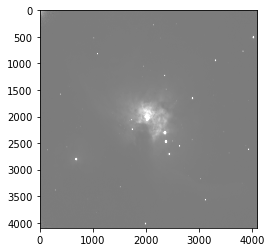

In [54]:
plt.imshow(Sharpened_Ga_Orion_V,cmap='gray',vmax=Sharpened_Ga_Orion_V.mean()+Sharpened_Ga_Orion_V.std(),vmin=Sharpened_Ga_Orion_V.mean()-Sharpened_Ga_Orion_V.std())

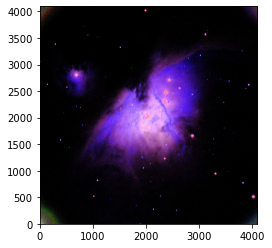

In [65]:
Orion_RGBa1=make_lupton_rgb(Orionsloanr,OrionV,Orionsloang,minimum=9,Q=5,stretch=10,filename='orionconotrocodigo.jpeg')
plt.imshow(Orion_RGBa1,origin='lower')

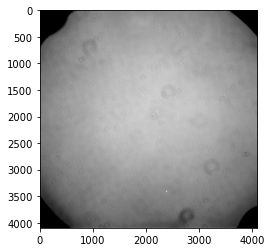

In [13]:
plt.imshow(Norm_Master_Flat_V,cmap='gray',vmax=Norm_Master_Flat_V.mean()+Norm_Master_Flat_V.std(),vmin=Norm_Master_Flat_V.mean()-Norm_Master_Flat_V.std())


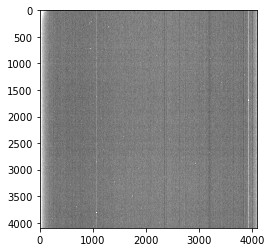

In [14]:
plt.imshow(Dark_Bias,cmap='gray',vmax=Dark_Bias.mean()+Dark_Bias.std(),vmin=Dark_Bias.mean()-Dark_Bias.std())

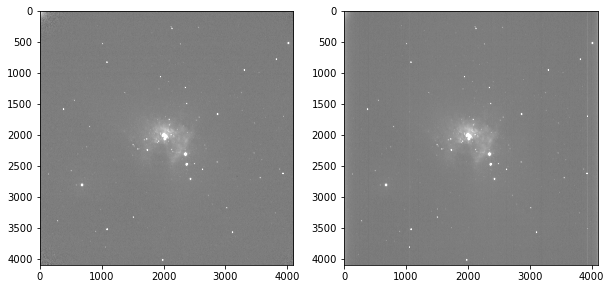

In [15]:
fig,ax=plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(Orion_B,cmap='gray',vmax=Orion_B.mean()+Orion_B.std(),vmin=Orion_B.mean()-Orion_B.std())
ax[1].imshow(Light_B[:,:,1],cmap='gray',vmin=Light_B[:,:,1].mean()-Light_B[:,:,1].std(),vmax=Light_B[:,:,1].mean()+Light_B[:,:,1].std())

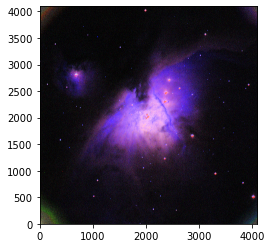

In [17]:
Orion_RGB1=make_lupton_rgb(Orion_sloan_r,Orion_V,Orion_sloan_g,minimum=9,Q=5,stretch=10,filename='Orion1.jpeg')
plt.imshow(Orion_RGB1,origin='lower')

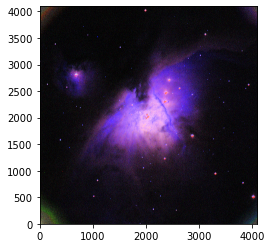

In [18]:
plt.imshow(Orion_RGB1,origin='lower')

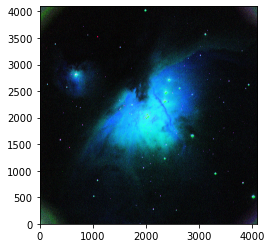

In [19]:
Orion_RGB2=make_lupton_rgb(Orion_sloan_i,Orion_sloan_r,Orion_sloan_g,minimum=9,Q=5,stretch=10,filename='Orion2.jpeg')
plt.imshow(Orion_RGB2,origin='lower')

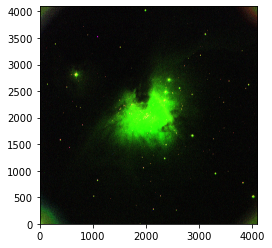

In [20]:
Orion_RGB3=make_lupton_rgb(Orion_sloan_i,Orion_V,Orion_B,minimum=9,Q=5,stretch=10,filename='Orion3.jpeg')
plt.imshow(Orion_RGB3,origin='lower')

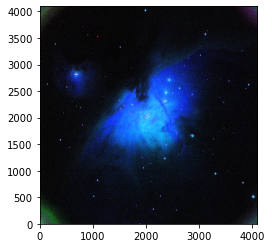

In [21]:
Orion_RGB4=make_lupton_rgb(Orion_sloan_i,Orion_V,Orion_sloan_g,minimum=9,Q=5,stretch=10,filename='Orion4.jpeg')
plt.imshow(Orion_RGB4,origin='lower')

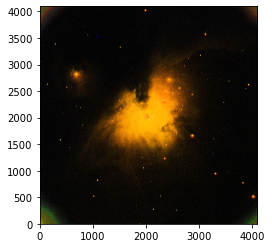

In [22]:
Orion_RGB5=make_lupton_rgb(Orion_sloan_r,Orion_V,Orion_B,minimum=10,Q=5,stretch=10,filename='Orion5.jpeg')
plt.imshow(Orion_RGB5,origin='lower')

NameError: name 'Orion_RGB1' is not defined

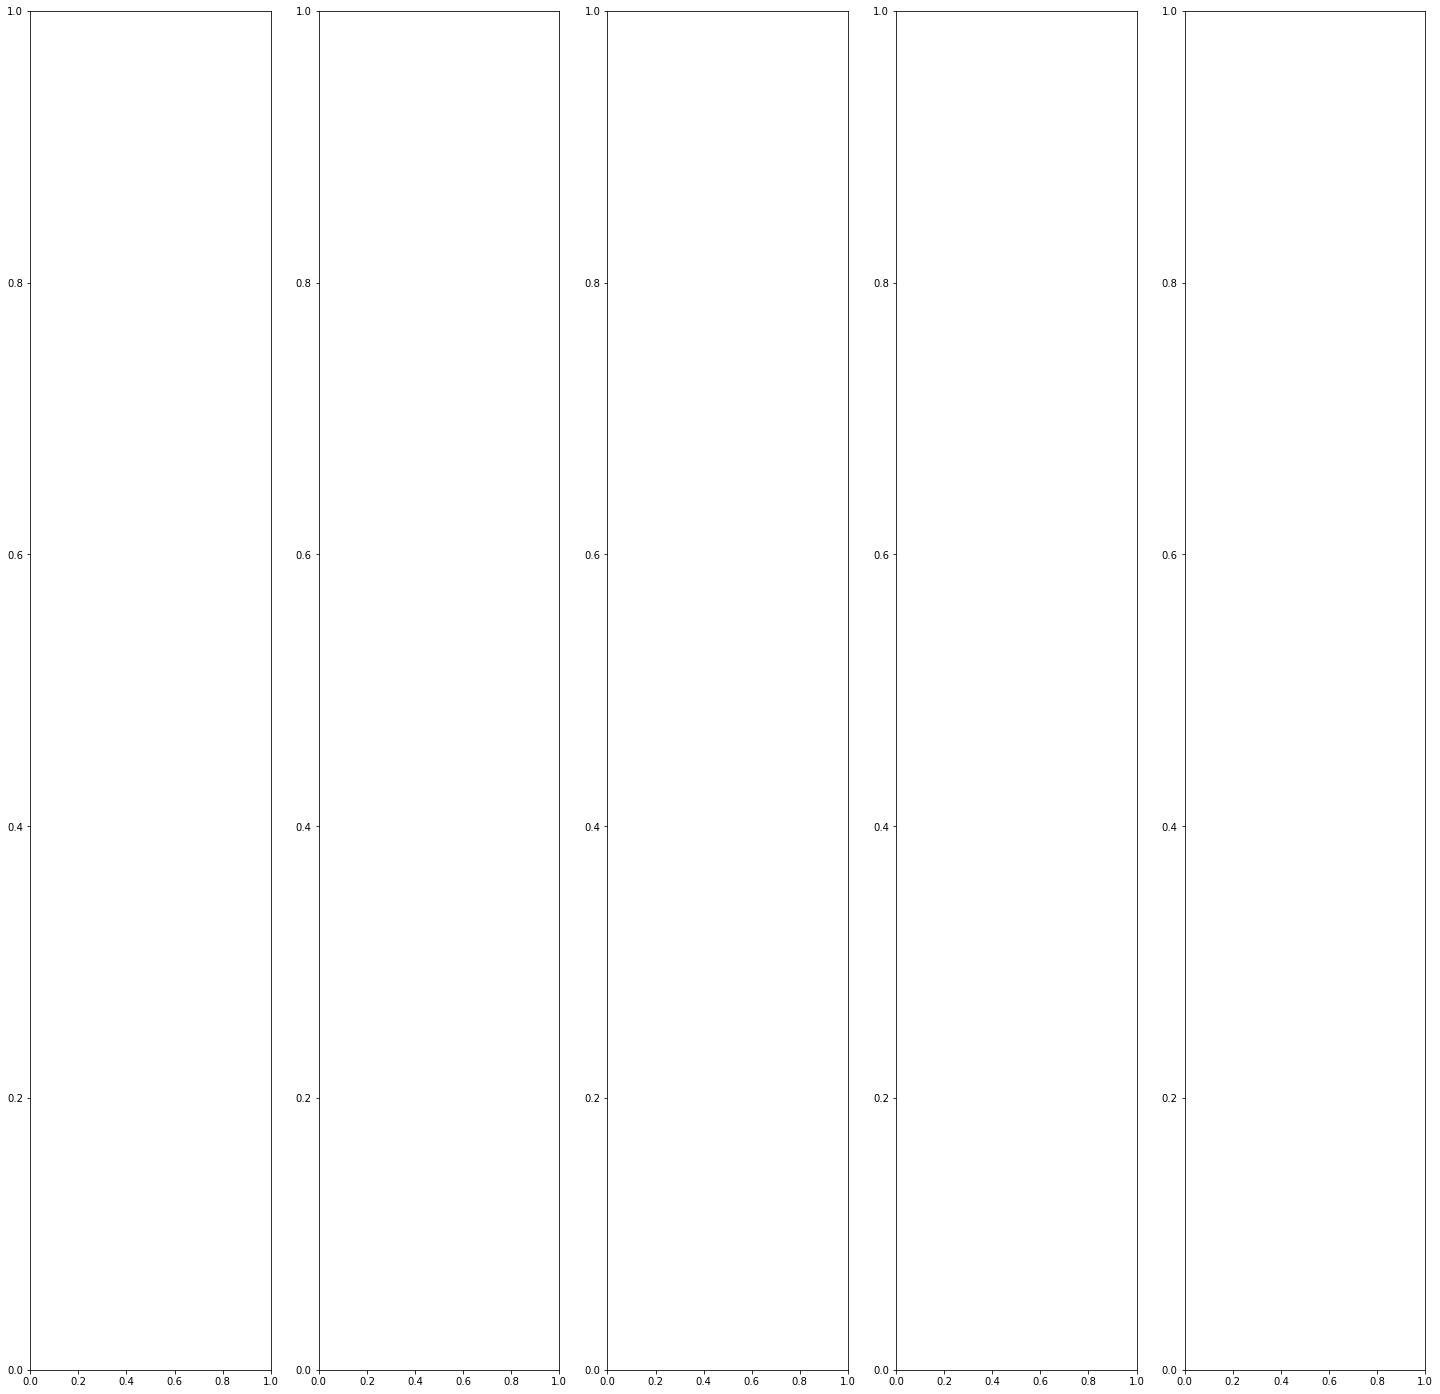

In [62]:
fig,ax=plt.subplots(1,5,figsize=(25,25))

ax[0].imshow(Orion_RGB1,origin='lower')
ax[1].imshow(Orion_RGB2,origin='lower')
ax[2].imshow(Orion_RGB3,origin='lower')
ax[3].imshow(Orion_RGB4,origin='lower')
ax[4].imshow(Orion_RGB5,origin='lower')

 ### Rayos cosmicos ###

## 47 Tucanae ##

In [ ]:
Light_B2=Fits_Array(Lb2)
Light_sloan_g2=Fits_Array(Lsg2)
Light_sloan_i2=Fits_Array(Lsi2)
Light_sloan_r2=Fits_Array(Lsr2)
Light_V2=Fits_Array(Lv2)

In [ ]:
Raw_Tuca_B=np.mean(Light_B2,axis=2)
Raw_Tuca_V=np.mean(Light_V2,axis=2)
Raw_Tuca_sloan_i=np.mean(Light_sloan_i2,axis=2)
Raw_Tuca_sloan_g=np.mean(Light_sloan_g2,axis=2)
Raw_Tuca_sloan_r=np.mean(Light_sloan_r2,axis=2)

In [ ]:
Tuca_B=(Raw_Tuca_B-Dark_Bias)/Norm_Master_Flat_B
Tuca_V=(Raw_Tuca_V-Dark_Bias)/Norm_Master_Flat_V
Tuca_sloan_r=(Raw_Tuca_sloan_r-Dark_Bias)/Norm_Master_Flat_sloan_r
Tuca_sloan_i=(Raw_Tuca_sloan_i-Dark_Bias)/Norm_Master_Flat_sloan_i
Tuca_sloan_g=(Raw_Tuca_sloan_g-Dark_Bias)/Norm_Master_Flat_sloan_g

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(10,10))

ax[0].imshow(Tuca_V,cmap='gray',vmax=Tuca_V.mean()+Tuca_V.std(),vmin=Tuca_V.mean()-Tuca_V.std())
ax[1].imshow(Light_V2[:,:,1],cmap='gray',vmin=Light_V2[:,:,1].mean()-Light_V2[:,:,1].std(),vmax=Light_V2[:,:,1].mean()+Light_V2[:,:,1].std())

In [ ]:
Tuca_RGB1=make_lupton_rgb(Tuca_sloan_r,Tuca_V,Tuca_sloan_g,minimum=9,Q=5,stretch=10,filename='Tucanae.jpeg')
plt.imshow(Tuca_RGB1,origin='lower')

In [ ]:
Tuca_RGB2=make_lupton_rgb(Tuca_sloan_i,Tuca_sloan_r,Tuca_sloan_g,minimum=9,Q=5,stretch=10,filename='Tucanae2.jpeg')
plt.imshow(Tuca_RGB2,origin='lower')

In [ ]:
Tuca_RGB3=make_lupton_rgb(Tuca_sloan_i,Tuca_V,Tuca_B,minimum=9,Q=5,stretch=10,filename='Tucanae3.jpeg')
plt.imshow(Tuca_RGB3,origin='lower')

In [ ]:
Tuca_RGB4=make_lupton_rgb(Tuca_sloan_i,Tuca_V,Tuca_sloan_g,minimum=9,Q=5,stretch=10,filename='Tucanae4.jpeg')
plt.imshow(Tuca_RGB4,origin='lower')

In [ ]:
Tuca_RGB5=make_lupton_rgb(Tuca_sloan_r,Tuca_V,Tuca_B,minimum=9,Q=5,stretch=10,filename='Tucanae3.jpeg')
plt.imshow(Tuca_RGB5,origin='lower')

In [ ]:
fig,ax=plt.subplots(1,5,figsize=(25,25))

ax[0].imshow(Tuca_RGB1,origin='lower')
ax[1].imshow(Tuca_RGB2,origin='lower')
ax[2].imshow(Tuca_RGB3,origin='lower')
ax[3].imshow(Tuca_RGB4,origin='lower')
ax[4].imshow(Tuca_RGB5,origin='lower')